In [0]:
'''Trains a simple convnet on the MNIST dataset.


'''

import tensorflow as tf

from tensorflow.keras.datasets import mnist, fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

# Functional API
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model

In [0]:
import os
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt

import IPython

# Load the data

In [0]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()


# Determine 
# - the dimensions of the input by examining the first training example
# - the dimensions of the output (number of classes) by examinimg the targets

input_size = np.prod(X_train[0].shape)
output_size = np.unique(y_train).shape[0]

# input image dimensions
img_rows, img_cols = X_train[0].shape[0:2]

batch_size=128
epochs = 20

# Utility routines

In [0]:
def prepareData(X_train, y_train, X_test, y_test, flatten=True):
  # normalize to range [0,1]
  # Flatten the data to one dimension 

  X_train, X_test = X_train.astype(np.float32), X_test.astype(np.float32)
  y_train, y_test = y_train.astype(np.float32), y_test.astype(np.float32)

  if flatten:
    X_train, X_test = X_train.reshape(-1, input_size), X_test.reshape(-1, input_size)

  # Normalize
  X_train, X_test = X_train/255.0, X_test/255.0
 
  valid_size = X_train.shape[0] // 10  
  X_valid, X_train = X_train[:valid_size], X_train[valid_size:]
  y_valid, y_train = y_train[:valid_size], y_train[valid_size:]

  return X_train, y_train, X_test, y_test, X_valid, y_valid

def showImage(img, ax=plt, cmap=None):
  # Some datasets (e.g., MNIST) have only 1 channel instead of 3
  if img.shape[-1] == 1:
    img = img[:,:, 0]
    cmap = "gray"
  
  
  if cmap is None:
    _= ax.imshow(img)
  else:
    _= ax.imshow(img, cmap=cmap)


def showTrain(xtrain, ytrain, num=5, cmap=None):
  #  ytrain is OHE
  isOHE = len(ytrain.shape) > 1
  if isOHE:
    num_classes = ytrain.shape[-1]
  else:
    num_classes = np.unique(ytrain).shape[-1]

  
  fig = plt.figure(figsize=(12,12))
  for thisClass in range(0, num_classes):
   
    if isOHE:
      xtrain_thisClass = xtrain[ ytrain[:,thisClass] == 1]
    else:
      xtrain_thisClass = xtrain[ ytrain == thisClass, ]

    for i in range(0,num):
      ax = fig.add_subplot(num_classes, num, thisClass * num + i +1)
      showImage(xtrain_thisClass[i], ax, cmap=cmap)

      # ax.set_title(y[i])
      # ax.set_xlabel( idxs[i] )
      ax.set_xticks([])
      ax.set_yticks([])


def plot_training(history, metrics=[]):
    """
    Plot training and validation statistics
    - accuracy vs epoch number
    - loss     vs epoch number

    From https://www.learnopencv.com/keras-tutorial-fine-tuning-using-pre-trained-models/
    """  

    # Loss
    loss = history.history['loss']

    epochs = range(len(loss))

    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.title('Training loss')
    plt.legend()

    plt.figure()

    for metric in metrics:
      metric_value = history.history[metric]
      plt.plot(epochs, metric_value, 'b', label="Training " + metric)
      plt.title('Training  accuracy')
      plt.legend()

    plt.show()

def trainModel(model, X_train, y_train, X_test, y_test, loss_fn=tf.keras.losses.sparse_categorical_crossentropy, batch_size=128, epochs=20):
  modelName="mnist_dnn"

  metrics = [ "acc" ]
  mnist_dnn_model.compile(loss=loss_fn,
                metrics=metrics)

  from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
  es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=.005, patience=2, verbose=0, mode='auto', baseline=None, restore_best_weights=True)

  callbacks = [ es_callback,
                ModelCheckpoint(filepath=modelName + ".ckpt", monitor='acc', save_best_only=True)
            ]

  history = mnist_dnn_model.fit(X_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    callbacks=callbacks,
    validation_data=(X_test, y_test))
  score = mnist_dnn_model.evaluate(X_test, y_test, verbose=0)
  print('Test loss:', score[0])

  return history

# Visualize the data

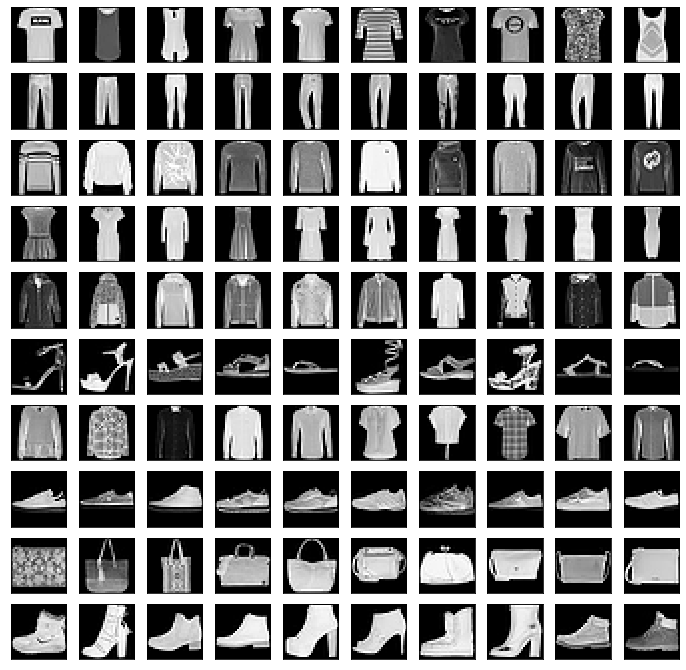

In [33]:
showTrain(X_train, y_train, num=10, cmap="gray")

# Normalize and flatten the 2D data

In [0]:
X_train, y_train, X_test, y_test, X_valid, y_valid = prepareData(X_train, y_train, X_test, y_test)


# Methods to create classifiers of various types

In [0]:
def createSimpleClassifier(num_classes):
  model = Sequential( [ Dense(num_classes, activation='softmax',
                              input_shape=(input_size,)       
                              )
                      ]   
                      )

  return model

def createOneLayerModel(num_units, num_classes):
  model = Sequential( [Dense(num_units, activation="relu",  input_shape=(input_size,) ),
                       Dense(num_classes, activation='softmax')
                      ]   
                      )

  return model

def createMultiLayerModel(num_units, num_classes):
  # Create model with first Dense layer (need to specify input_shape for first layer)
  model = Sequential( [ Dense(num_units[0], activation="relu",  input_shape=(input_size,) ) ] )

  # Add the rest of the Dense layers
  for units in num_units[1:]:
    model.add( Dense(num_units[0], activation="relu") )

  # Add classifier layer
  model.add(Dense(num_classes, activation='softmax'))


  return model



# Create a simple classifier


In [36]:
mnist_dnn_model = createSimpleClassifier(output_size)
history = trainModel(mnist_dnn_model, X_train, y_train, X_test, y_test)

Train on 54000 samples, validate on 10000 samples
Epoch 1/20
54000/54000 [==============================] - 2s 33us/sample - loss: 0.7025 - acc: 0.7696 - val_loss: 0.5511 - val_acc: 0.8142
Epoch 2/20
54000/54000 [==============================] - 1s 26us/sample - loss: 0.5016 - acc: 0.8298 - val_loss: 0.5209 - val_acc: 0.8172
Epoch 3/20
54000/54000 [==============================] - 1s 27us/sample - loss: 0.4664 - acc: 0.8414 - val_loss: 0.4921 - val_acc: 0.8331
Epoch 4/20
54000/54000 [==============================] - 1s 26us/sample - loss: 0.4489 - acc: 0.8479 - val_loss: 0.4766 - val_acc: 0.8385
Epoch 5/20
54000/54000 [==============================] - 1s 26us/sample - loss: 0.4367 - acc: 0.8511 - val_loss: 0.4728 - val_acc: 0.8372
Epoch 6/20
54000/54000 [==============================] - 1s 25us/sample - loss: 0.4282 - acc: 0.8545 - val_loss: 0.4621 - val_acc: 0.8396
Epoch 7/20
54000/54000 [==============================] - 1s 28us/sample - loss: 0.4222 - acc: 0.8575 - val_loss: 0.

In [37]:
test_loss, test_accuracy = mnist_dnn_model.evaluate(X_test, y_test)
print("Test dataset: loss={tl:5.4f}, accuracy={ta:5.4f}".format(tl=test_loss, ta=test_accuracy))

10000/10000 [==============================] - 1s 59us/sample - loss: 0.4621 - acc: 0.8396
Test dataset: loss=0.4621, accuracy=0.8396


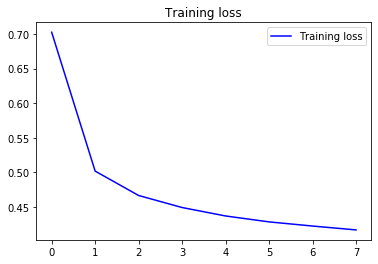

<Figure size 432x288 with 0 Axes>

In [38]:
plot_training(history)

# `sparse_categorical_crossentropy` verssus `categorical_crossentropy` 
- `sparse_categorical_crossentropy`: y is numeric (scalar)
- `categorical_crossentropy`: y is OHE


In [39]:
y_train[:2]

array([8., 6.], dtype=float32)

## Use OHE for y


In [0]:
# convert class vectors to binary class matrices
y_train_OHE = tf.keras.utils.to_categorical(y_train, output_size)
y_test_OHE = tf.keras.utils.to_categorical(y_test, output_size)


In [41]:
y_train_OHE[:2]

array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

## Train again, using OHE for  y, and get same results

In [42]:
history = trainModel(mnist_dnn_model, X_train, y_train_OHE, X_test, y_test_OHE, loss_fn=tf.keras.losses.categorical_crossentropy)


Train on 54000 samples, validate on 10000 samples
Epoch 1/20
54000/54000 [==============================] - 2s 38us/sample - loss: 0.4223 - acc: 0.8568 - val_loss: 0.4649 - val_acc: 0.8397
Epoch 2/20
54000/54000 [==============================] - 2s 31us/sample - loss: 0.4166 - acc: 0.8594 - val_loss: 0.4613 - val_acc: 0.8408
Epoch 3/20
54000/54000 [==============================] - 2s 32us/sample - loss: 0.4129 - acc: 0.8600 - val_loss: 0.4619 - val_acc: 0.8409
Test loss: 0.4649167972564697


In [43]:
test_loss, test_accuracy = mnist_dnn_model.evaluate(X_test, y_test_OHE)
print("Test dataset: loss={tl:5.4f}, accuracy={ta:5.4f}".format(tl=test_loss, ta=test_accuracy))

10000/10000 [==============================] - 1s 71us/sample - loss: 0.4649 - acc: 0.8397
Test dataset: loss=0.4649, accuracy=0.8397


# Add a layer before the classifier

In [44]:
mnist_dnn_model = createOneLayerModel(100, output_size)
trainModel(mnist_dnn_model, X_train, y_train, X_test, y_test)

Train on 54000 samples, validate on 10000 samples
Epoch 1/20
54000/54000 [==============================] - 2s 40us/sample - loss: 0.6075 - acc: 0.7877 - val_loss: 0.4810 - val_acc: 0.8324
Epoch 2/20
54000/54000 [==============================] - 2s 29us/sample - loss: 0.4316 - acc: 0.8476 - val_loss: 0.4243 - val_acc: 0.8475
Epoch 3/20
54000/54000 [==============================] - 2s 30us/sample - loss: 0.3840 - acc: 0.8614 - val_loss: 0.4067 - val_acc: 0.8553
Epoch 4/20
54000/54000 [==============================] - 2s 31us/sample - loss: 0.3528 - acc: 0.8729 - val_loss: 0.3971 - val_acc: 0.8552
Epoch 5/20
54000/54000 [==============================] - 2s 29us/sample - loss: 0.3306 - acc: 0.8812 - val_loss: 0.3601 - val_acc: 0.8734
Epoch 6/20
54000/54000 [==============================] - 2s 30us/sample - loss: 0.3161 - acc: 0.8849 - val_loss: 0.3687 - val_acc: 0.8660
Epoch 7/20
54000/54000 [==============================] - 2s 33us/sample - loss: 0.3006 - acc: 0.8916 - val_loss: 0.

# Create models of various depths using a function

In [45]:
trained = {}

for dense_spec in ( [10], [20], [30], [100],
                   [30,30], [50,50]
):

  print("\n\nTraining with Dense layer sizes: ", dense_spec)
  model_name = ", ".join( [ str(e) for e in dense_spec ])

  # Create the model
  mnist_dnn_model =  createMultiLayerModel( dense_spec, output_size)

  # Train the model
  history = trainModel(mnist_dnn_model, X_train, y_train, X_test, y_test)

  # Save the results
  results = { "model": mnist_dnn_model, "history": history}
  trained[model_name] = results




Training with Dense layer sizes:  [10]
Train on 54000 samples, validate on 10000 samples
Epoch 1/20
54000/54000 [==============================] - 2s 39us/sample - loss: 0.8966 - acc: 0.7073 - val_loss: 0.6117 - val_acc: 0.7904
Epoch 2/20
54000/54000 [==============================] - 2s 28us/sample - loss: 0.5369 - acc: 0.8166 - val_loss: 0.5250 - val_acc: 0.8210
Epoch 3/20
54000/54000 [==============================] - 2s 29us/sample - loss: 0.4806 - acc: 0.8339 - val_loss: 0.4898 - val_acc: 0.8288
Epoch 4/20
54000/54000 [==============================] - 2s 31us/sample - loss: 0.4541 - acc: 0.8416 - val_loss: 0.4907 - val_acc: 0.8293
Epoch 5/20
54000/54000 [==============================] - 2s 32us/sample - loss: 0.4367 - acc: 0.8475 - val_loss: 0.4926 - val_acc: 0.8259
Test loss: 0.48984382572174073


Training with Dense layer sizes:  [20]
Train on 54000 samples, validate on 10000 samples
Epoch 1/20
54000/54000 [==============================] - 2s 41us/sample - loss: 0.7125 - ac

In [46]:
trained.keys()

dict_keys(['10', '20', '30', '100', '30, 30', '50, 50'])

# Examine a model

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 50)                39250     
_________________________________________________________________
dense_32 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_33 (Dense)             (None, 10)                510       
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


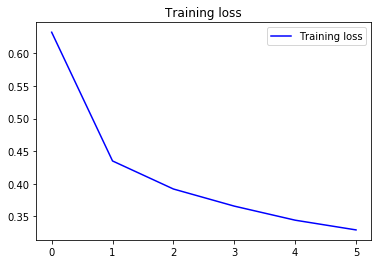

<Figure size 432x288 with 0 Axes>

In [47]:

model_name = '10'
resuts = trained[model_name]
model, history = results["model"], results["history"]

model.summary()
plot_training(history)
